In [ ]:
import os
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(ROOT_DIR)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\X_train.txt')
y_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\y_train.txt')

X_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\X_test.txt')
y_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\y_test.txt')

y_train = to_categorical(y_train - 1)  
y_test = to_categorical(y_test - 1)

X_train_cnn = X_train.reshape(X_train.shape[0], 561, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 561, 1)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train)
X_test_cnn = scaler.transform(X_test)

In [4]:
from models.bilstm_model import bilstm_model
model = bilstm_model((561, 1))
model.summary()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 561, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 561, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,286 (301.90 KB)

 Trainable params: 77,286 (301.90 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3),
    ModelCheckpoint("./models/bilstm_model.h5", save_best_only=True)
]

In [26]:
bilstm_history = model.fit(X_train_cnn, y_train, 
          epochs=20, 
          validation_split=0.2,
          batch_size=64,
          callbacks=callbacks,
          verbose=1
          )

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7171 - loss: 0.6637

92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 450ms/step - accuracy: 0.7335 - loss: 0.6319 - val_accuracy: 0.7961 - val_loss: 0.6272 - learning_rate: 0.0010
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 0.7427 - loss: 0.5949 - val_accuracy: 0.7967 - val_loss: 0.6437 - learning_rate: 0.0010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.7660 - loss: 0.5474

92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 406ms/step - accuracy: 0.7653 - loss: 0.5435 - val_accuracy: 0.7981 - val_loss: 0.6196 - learning_rate: 0.0010
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 419ms/step - accuracy: 0.7898 - loss: 0.4901 - val_accuracy: 0.8137 - val_loss: 0.6297 - learning_rate: 0.0010
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.8061 - loss: 0.4689

92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 414ms/step - accuracy: 0.8014 - loss: 0.4679 - val_accuracy: 0.8511 - val_loss: 0.5725 - learning_rate: 0.0010
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 433ms/step - accuracy: 0.8152 - loss: 0.4349 - val_accuracy: 0.8436 - val_loss: 0.5914 - learning_rate: 0.0010
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 428ms/step - accuracy: 0.8189 - loss: 0.4243 - val_accuracy: 0.8253 - val_loss: 0.5870 - learning_rate: 0.0010
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8342 - loss: 0.3950

92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 409ms/step - accuracy: 0.8352 - loss: 0.3951 - val_accuracy: 0.8634 - val_loss: 0.4954 - learning_rate: 0.0010
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 473ms/step - accuracy: 0.8376 - loss: 0.3784 - val_accuracy: 0.8647 - val_loss: 0.5046 - learning_rate: 0.0010
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 499ms/step - accuracy: 0.8543 - loss: 0.3505 - val_accuracy: 0.8715 - val_loss: 0.4997 - learning_rate: 0.0010
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 532ms/step - accuracy: 0.8572 - loss: 0.3474 - val_accuracy: 0.8334 - val_loss: 0.5754 - learning_rate: 0.0010
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.8691 - loss: 0.3254 - val_accuracy: 0.8613 - val_loss: 0.5044 - learning_rate: 5.0000e-04
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.8717 - loss: 0.3098

92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 408ms/step - accuracy: 0.8713 - loss: 0.3065 - val_accuracy: 0.8749 - val_loss: 0.4896 - learning_rate: 5.0000e-04
Epoch 14/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8692 - loss: 0.3065

92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 423ms/step - accuracy: 0.8725 - loss: 0.2987 - val_accuracy: 0.8736 - val_loss: 0.4597 - learning_rate: 5.0000e-04
Epoch 15/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.8809 - loss: 0.2924

92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.8801 - loss: 0.2942 - val_accuracy: 0.8844 - val_loss: 0.4530 - learning_rate: 5.0000e-04
Epoch 16/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8887 - loss: 0.2717

92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 463ms/step - accuracy: 0.8818 - loss: 0.2831 - val_accuracy: 0.8844 - val_loss: 0.4520 - learning_rate: 5.0000e-04
Epoch 17/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8818 - loss: 0.2778

92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 489ms/step - accuracy: 0.8874 - loss: 0.2720 - val_accuracy: 0.8967 - val_loss: 0.4351 - learning_rate: 5.0000e-04
Epoch 18/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 501ms/step - accuracy: 0.8832 - loss: 0.2721 - val_accuracy: 0.8831 - val_loss: 0.4440 - learning_rate: 5.0000e-04
Epoch 19/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.8860 - loss: 0.2602

92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 479ms/step - accuracy: 0.8859 - loss: 0.2645 - val_accuracy: 0.8824 - val_loss: 0.4293 - learning_rate: 5.0000e-04
Epoch 20/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 493ms/step - accuracy: 0.8946 - loss: 0.2584 - val_accuracy: 0.8878 - val_loss: 0.4310 - learning_rate: 5.0000e-04


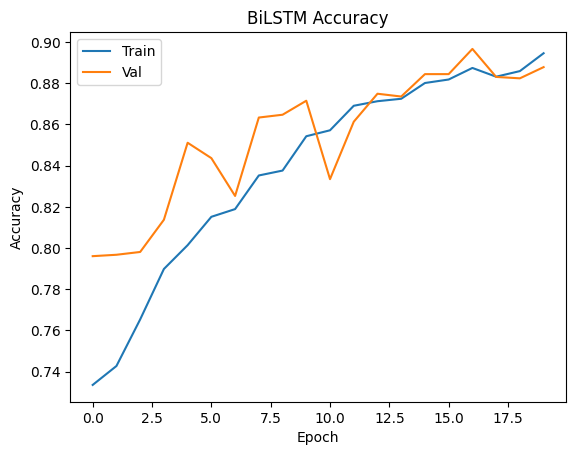

In [28]:
import matplotlib.pyplot as plt

plt.plot(bilstm_history.history["accuracy"])
plt.plot(bilstm_history.history["val_accuracy"])
plt.title("BiLSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print("Test Accuracy:", test_acc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8493 - loss: 0.4259
Test Accuracy: 0.8493382930755615
